<a href="https://colab.research.google.com/github/AngieChong/Research-Paper/blob/main/P1_Prediction_of_Inpatient_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATASETS - Inpatient

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
df = pd.read_csv("Inpatient_2019-2022.csv")
df.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CorporateID,Corporate,ClaimType,ClaimNo,Date,DischargeDate,MCDays,AmountIncurred,AmountInsured,ExcessPaid,...,PatientGender,MedicalProviders,Diagnosis,DiagnosisGroup,HospCharges,Doctor,ICDCode,ProviderState,IsPanel,IndustryField
0,HESS,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP09190002,6/26/2019,6/28/2019,2.0,"6,626.90","5,000.00","1,626.90",...,F,ANDORRA WOMEN & CHILDREN HOSPITAL,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KHAMSIAH BINTI MUDA,Z37,SELANGOR,Non-Panel,Manufacturing Factory/Company
1,HESS,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP10190003,6/30/2019,7/1/2019,1.0,"3,641.00","3,641.00",0,...,F,OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KAMARIA IDRIS,Z37,KUALA LUMPUR,Non-Panel,Manufacturing Factory/Company
2,HESS,HESS EXPLORATION AND PRODUCTION MALAYSIA B.V.,Inpatient,HESSCIP10190004,6/26/2019,6/28/2019,2.0,949,949,0,...,F,ANDORRA WOMEN & CHILDREN HOSPITAL,Other specified conditions of integument speci...,Certain conditions originating in the perinata...,HIGH,KHAMSIAH BINTI MUDA,P83.8,SELANGOR,Non-Panel,Manufacturing Factory/Company
3,MIC,MiCare Sdn Bhd (ASO),Inpatient,CIP03190003,2/6/2019,2/9/2019,3.0,719.95,719.95,0,...,M,COLUMBIA ASIA HOSPITAL - KLANG,Abdominal and pelvic pain,"Symptoms, signs and abnormal clinical and labo...",LOW,ROSLIZA GHAZALI,R10,SELANGOR,Non-Panel,Management Services Company
4,60023249,CD ADVERTISING SDN BHD (60023249),Inpatient,60023249CIP02190001,1/31/2019,2/3/2019,3.0,"14,186.90","13,941.90",245,...,F,KPJ DAMANSARA SPECIALIST HOSPITAL,UTERINE FIBROIDS,Neoplasms,HIGH,"SUSANNA HUAM SIEW HOON ,JUDE MORGAN",D25,SELANGOR,Panel,Consultancy


In [ ]:
print(df.columns)

In [ ]:
#2 Possibility - Encode column (Anonymisation)
#Import LabelEncoder from sklearn / DataFrameMapper from sklearn_pandas
from sklearn.preprocessing import LabelEncoder
#!pip install sklearn
from sklearn_pandas import DataFrameMapper

encoders = [(["Corporate"], LabelEncoder())]
mapper = DataFrameMapper(encoders, df_out=True)
label_col = mapper.fit_transform(df.copy())
df_3 = pd.concat([df.drop(columns=["Corporate"]), label_col], axis="columns")
df_3.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,CorporateID,ClaimType,ClaimNo,Date,DischargeDate,MCDays,AmountIncurred,AmountInsured,ExcessPaid,Status,...,MedicalProviders,Diagnosis,DiagnosisGroup,HospCharges,Doctor,ICDCode,ProviderState,IsPanel,IndustryField,Corporate
0,HESS,Inpatient,HESSCIP09190002,6/26/2019,6/28/2019,2.0,"6,626.90","5,000.00","1,626.90",PROCESSED,...,ANDORRA WOMEN & CHILDREN HOSPITAL,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KHAMSIAH BINTI MUDA,Z37,SELANGOR,Non-Panel,Manufacturing Factory/Company,2280
1,HESS,Inpatient,HESSCIP10190003,6/30/2019,7/1/2019,1.0,"3,641.00","3,641.00",0,PROCESSED,...,OHANA SPECIALIST HOSPITAL (FORMELY KNOWN AS RA...,Outcome of delivery,Factors influencing health status and contact ...,HIGH,KAMARIA IDRIS,Z37,KUALA LUMPUR,Non-Panel,Manufacturing Factory/Company,2280
2,HESS,Inpatient,HESSCIP10190004,6/26/2019,6/28/2019,2.0,949,949,0,PROCESSED,...,ANDORRA WOMEN & CHILDREN HOSPITAL,Other specified conditions of integument speci...,Certain conditions originating in the perinata...,HIGH,KHAMSIAH BINTI MUDA,P83.8,SELANGOR,Non-Panel,Manufacturing Factory/Company,2280


## EXPLORATORY DATA ANALYSIS

### DATA DESCRIPTION

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837784 entries, 0 to 837783
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CorporateID       837784 non-null  object
 1   Corporate         837784 non-null  object
 2   ClaimType         837784 non-null  object
 3   ClaimNo           837784 non-null  object
 4   Date              837784 non-null  object
 5   DischargeDate     837784 non-null  object
 6   MCDays            834918 non-null  object
 7   AmountIncurred    837784 non-null  object
 8   AmountInsured     837784 non-null  object
 9   ExcessPaid        837784 non-null  object
 10  Status            837784 non-null  object
 11  TypeOfClaims      837784 non-null  object
 12  TotalVisit        837784 non-null  int64 
 13  IsSurgical        837784 non-null  object
 14  IsLTM             837784 non-null  object
 15  IsMultipleDiag    837784 non-null  object
 16  BenefitPlan       837706 non-null  obj

In [ ]:
df['AmountInsured'] = df.AmountInsured.astype(int)
print(df.dtypes)

ValueError: ignored

In [ ]:
#df.shape

print('Number of rows: '+ format(df.shape[0]) +', number of features: '+ format(df.shape[1]))

(837784, 32)

In [ ]:
df.describe()

,TotalVisit
count,837784.000000
mean,0.495568
std,0.499983
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CorporateID,837784,6817,ALM,91667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Corporate,837784,6742,TOKIO MARINE LIFE INSURANCE MALAYSIA BERHAD,91667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimType,837784,1,Inpatient,837784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimNo,837784,837725,2.02E+11,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,837784,1430,7/12/2021,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DischargeDate,837784,1597,7/12/2021,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCDays,834918.0,761.0,0.0,176895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmountIncurred,837784,264875,500,17717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AmountInsured,837784,278656,0,24513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExcessPaid,837784,76175,0,523395,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DATA VISUALIZATION

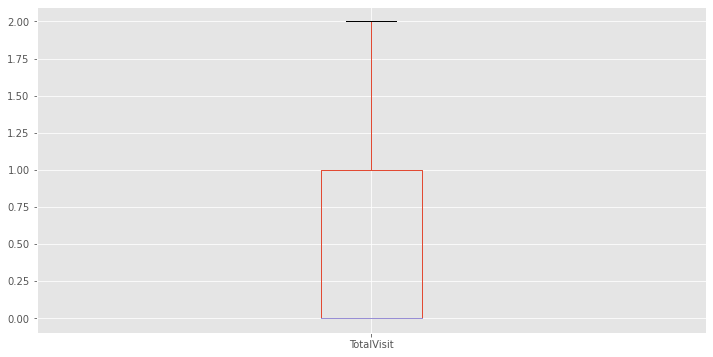

In [ ]:
df[['TotalVisit']].boxplot()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8),dpi=100)
sns.boxplot(data=df, x='AgeBand', y='AmountInsured')

In [ ]:
df.groupby(['AGE']).mean()['TOTCHG'].sort_values(ascending=False)


In [ ]:
sns.barplot(data=df, x='AgeBand', y='AmountInsured')

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df, x='APRDRG');

In [ ]:
sns.displot(data=df, x='TOTCHG', kde=True)

In [ ]:


sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

### Correlation Checking

In [ ]:
SpearmanCorr = df_final.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

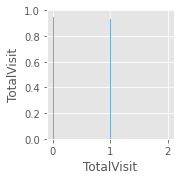

In [ ]:
# Study of relationships between variables
sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: ignored

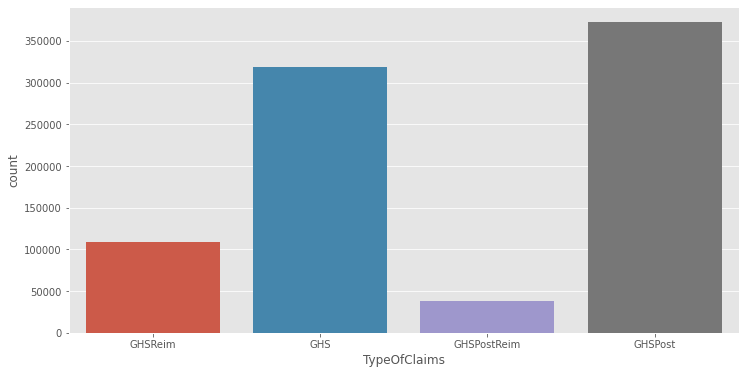

In [ ]:
sns.countplot(df['TypeOfClaims']).unique()

In [ ]:
df.corr()

,TotalVisit
TotalVisit,1.0


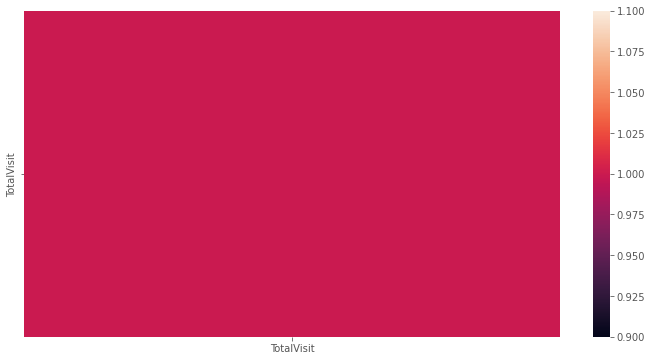

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

## DATA CLEANING

### CHECK DIRTY DATA

In [ ]:
df.isna().sum()

CorporateID             0
Corporate               0
ClaimType               0
ClaimNo                 0
Date                    0
DischargeDate           0
MCDays               2866
AmountIncurred          0
AmountInsured           0
ExcessPaid              0
Status                  0
TypeOfClaims            0
TotalVisit              0
IsSurgical              0
IsLTM                   0
IsMultipleDiag          0
BenefitPlan            78
EmployeeID              0
PatientID               0
Relationship            0
PatientDOB             64
AgeBand                 0
PatientGender       47055
MedicalProviders      731
Diagnosis           52689
DiagnosisGroup      56414
HospCharges             0
Doctor                  0
ICDCode             52689
ProviderState       75880
IsPanel                 0
IndustryField           0
dtype: int64

Below showing the missing data is small percentage contibuted in the dataset.

In [ ]:
(df.isna().sum()/len(df))*100

CorporateID         0.000000
Corporate           0.000000
ClaimType           0.000000
ClaimNo             0.000000
Date                0.000000
DischargeDate       0.000000
MCDays              0.342093
AmountIncurred      0.000000
AmountInsured       0.000000
ExcessPaid          0.000000
Status              0.000000
TypeOfClaims        0.000000
TotalVisit          0.000000
IsSurgical          0.000000
IsLTM               0.000000
IsMultipleDiag      0.000000
BenefitPlan         0.009310
EmployeeID          0.000000
PatientID           0.000000
Relationship        0.000000
PatientDOB          0.007639
AgeBand             0.000000
PatientGender       5.616603
MedicalProviders    0.087254
Diagnosis           6.289091
DiagnosisGroup      6.733717
HospCharges         0.000000
Doctor              0.000000
ICDCode             6.289091
ProviderState       9.057227
IsPanel             0.000000
IndustryField       0.000000
dtype: float64

### CHECK DUPLICATE DATA

Based on results below show that there have no duplicated data inside the dataset.

In [ ]:
df.duplicated().sum()

0

### CHECK NULL VALUES

In [ ]:
df.isnull().sum()

CorporateID             0
Corporate               0
ClaimType               0
ClaimNo                 0
Date                    0
DischargeDate           0
MCDays               2866
AmountIncurred          0
AmountInsured           0
ExcessPaid              0
Status                  0
TypeOfClaims            0
TotalVisit              0
IsSurgical              0
IsLTM                   0
IsMultipleDiag          0
BenefitPlan            78
EmployeeID              0
PatientID               0
Relationship            0
PatientDOB             64
AgeBand                 0
PatientGender       47055
MedicalProviders      731
Diagnosis           52689
DiagnosisGroup      56414
HospCharges             0
Doctor                  0
ICDCode             52689
ProviderState       75880
IsPanel                 0
IndustryField           0
dtype: int64

In [ ]:
(df.isnull().sum()/len(df))*100

CorporateID         0.000000
Corporate           0.000000
ClaimType           0.000000
ClaimNo             0.000000
Date                0.000000
DischargeDate       0.000000
MCDays              0.342093
AmountIncurred      0.000000
AmountInsured       0.000000
ExcessPaid          0.000000
Status              0.000000
TypeOfClaims        0.000000
TotalVisit          0.000000
IsSurgical          0.000000
IsLTM               0.000000
IsMultipleDiag      0.000000
BenefitPlan         0.009310
EmployeeID          0.000000
PatientID           0.000000
Relationship        0.000000
PatientDOB          0.007639
AgeBand             0.000000
PatientGender       5.616603
MedicalProviders    0.087254
Diagnosis           6.289091
DiagnosisGroup      6.733717
HospCharges         0.000000
Doctor              0.000000
ICDCode             6.289091
ProviderState       9.057227
IsPanel             0.000000
IndustryField       0.000000
dtype: float64

In [ ]:
#df.loc[df['MCDays']==0.0,'MCDays']=np.nan
#df.MCDays.isnull().sum()
#df['MCDays'].fillna(value=np.mean(df['MCDays']),inplace=True)

x = df['MCDays'].mean()
df['MCDays'].fillna(x, inplace = True)
df.MCDays.isnull().sum()

TypeError: ignored

In [ ]:
Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")